# Logistic Regression

## 1. Predicting a continuous response
- Using linear regression model

In [ ]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort('al', inplace=True)
glass.head()

In [ ]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

In [ ]:
len(glass)

In [ ]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [ ]:
# fit a linear regression model and store the predictions
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

In [ ]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

## 2. Predicting a categorical response
- Using logistic regression

In [ ]:
# transform household_pred to 1 or 0
import numpy as np
glass['household_pared_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

In [ ]:
glass.head(5)

In [ ]:
test = logreg.predict_proba(X)
print(test)

In [ ]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [ ]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## 3. Iris data classification

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

/Users/kth/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Standardizing the features:

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

Training a logistic regression model with scikit-learn

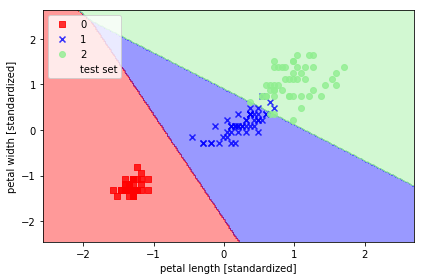

In [5]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [6]:
lr.predict_proba(X_test_std[0, :])

/Users/kth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

# 4. Classification with TItanic dataset
- Data from Kaggle's Titanic competition: [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

In [7]:
import pandas as pd
url = 'data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1000)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.82242418640816817), ('Parch', 0.27167984457549266)]


In [11]:
print(logreg.coef_)
print(logreg.coef_[0])

[[-0.82242419  0.27167984]]
[-0.82242419  0.27167984]


In [12]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [13]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.699551569507


# 5. How to evaluate the classification model

## Using confusion matrix

In [14]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  25]
 [ 42  42]]


In [15]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [16]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 42
True Negatives: 114
False Positives: 25
False Negatives: 42


In [17]:
# calculate the sensitivity
print('Sensitivity:', TP / (TP + FN))

Sensitivity: 0.5


In [18]:
# calculate the specificity
print('Specificity:', TN / (TN + FP))

Specificity: 0.820143884892


### How about using other threshold?
- If y_pred_prob > 0.3, than y_pred_class = 1

In [19]:
test = logreg.predict_proba(X_test)
print(test)

[[ 0.70866641  0.29133359]
 [ 0.76144096  0.23855904]
 [ 0.38124844  0.61875156]
 [ 0.38124844  0.61875156]
 [ 0.76144096  0.23855904]
 [ 0.58374631  0.41625369]
 [ 0.58374631  0.41625369]
 [ 0.58374631  0.41625369]
 [ 0.70866641  0.29133359]
 [ 0.51846071  0.48153929]
 [ 0.64958968  0.35041032]
 [ 0.76144096  0.23855904]
 [ 0.31953003  0.68046997]
 [ 0.76144096  0.23855904]
 [ 0.38124844  0.61875156]
 [ 0.70866641  0.29133359]
 [ 0.38124844  0.61875156]
 [ 0.38124844  0.61875156]
 [ 0.51846071  0.48153929]
 [ 0.58374631  0.41625369]
 [ 0.64958968  0.35041032]
 [ 0.4488822   0.5511178 ]
 [ 0.58374631  0.41625369]
 [ 0.70866641  0.29133359]
 [ 0.70866641  0.29133359]
 [ 0.76144096  0.23855904]
 [ 0.76144096  0.23855904]
 [ 0.38124844  0.61875156]
 [ 0.76144096  0.23855904]
 [ 0.76144096  0.23855904]
 [ 0.64958968  0.35041032]
 [ 0.51661682  0.48338318]
 [ 0.58374631  0.41625369]
 [ 0.76144096  0.23855904]
 [ 0.51661682  0.48338318]
 [ 0.76144096  0.23855904]
 [ 0.76144096  0.23855904]
 

In [20]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

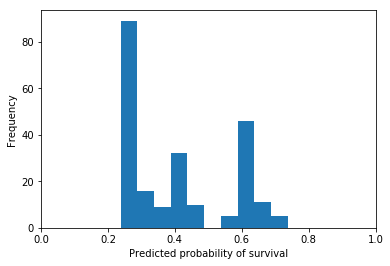

In [22]:
# histogram of predicted probabilities
%matplotlib inline
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [23]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class_new = np.where(y_pred_prob >= 0.3, 1, 0)

In [24]:
# old confusion matrix
print(confusion)

[[114  25]
 [ 42  42]]


In [25]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class_new)
print(confusion_new)

[[84 55]
 [21 63]]


In [26]:
TP = confusion_new[1][1]
TN = confusion_new[0][0]
FP = confusion_new[0][1]
FN = confusion_new[1][0]

In [27]:
# new sensitivity (higher than before)
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.75


In [28]:
# new specificity (lower than before)
print('Specificity:', TN / float(TN + FP))

Specificity: 0.604316546763


## ROC, auroc

### Drawing ROC curve and calculate AUC

In [29]:
from sklearn.metrics import roc_curve, auc

In [30]:
classifier = LogisticRegression(penalty='l2', C=1)
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [31]:
print(y_prob[0:5,:])

[[ 0.70491473  0.29508527]
 [ 0.75808298  0.24191702]
 [ 0.39390225  0.60609775]
 [ 0.39390225  0.60609775]
 [ 0.75808298  0.24191702]]


In [32]:
print(y_score[0:5])

[-0.87081249 -1.14219806  0.43093848  0.43093848 -1.14219806]


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()